<a href="https://colab.research.google.com/github/Swathi04/data-mining-cmpe255-colab-preprocessing/blob/main/DataMiningSwathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Mining Assignment 1
Dataset with Airbnb prices in Berlin for analysis purpose to anyone planning to start an accomodation in the neighbourhood
Dataset source: https://www.kaggle.com/brittabettendorf/berlin-airbnb-data?select=listings.csv



##Necessary Imports:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Kaggle setup to load dataset

In [2]:
!rm -rf ~/.kaggle
!ls

sample_data


In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swathianandram","key":"dae954eb4b7a44cc4b214d95b296b334"}'}

In [4]:
!ls

kaggle.json  sample_data


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download brittabettendorf/berlin-airbnb-data

 97% 85.0M/87.7M [00:00<00:00, 114MB/s] 
100% 87.7M/87.7M [00:00<00:00, 112MB/s]


In [7]:
!ls
!unzip berlin-airbnb-data.zip

berlin-airbnb-data.zip	kaggle.json  sample_data
Archive:  berlin-airbnb-data.zip
  inflating: calendar_summary.csv    
  inflating: listings.csv            
  inflating: listings_summary.csv    
  inflating: neighbourhoods.csv      
  inflating: reviews.csv             
  inflating: reviews_summary.csv     


##Load dataset

In [8]:
data_frame = pd.read_csv('listings_summary.csv')
data_frame.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,...,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any

In [9]:
print('Number of entries in dataset: ', len(data_frame.axes[0]))
print('Number of columns in dataset: ', len(data_frame.axes[1]))
print('Duplicate row count: ', data_frame.duplicated().sum())
data_frame.shape

Number of entries in dataset:  22552
Number of columns in dataset:  96
Duplicate row count:  0


(22552, 96)

##Preprocessing

###Columns present in the dataset

In [10]:
sorted(data_frame)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_business_travel_ready',
 'is_location_exact',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'latitud

###Selecting columns which are necessary for analysis

In [11]:
data_frame = data_frame[['id', 'listing_url', 'space', 'property_type', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'beds', 'bed_type', 'room_type', 'amenities', 'square_feet', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'host_is_superhost', 'summary']]
data_frame.shape

(22552, 22)

In [12]:
data_frame.head()

,id,listing_url,space,property_type,street,neighbourhood_cleansed,neighbourhood_group_cleansed,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,1,$28.00,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,1,$0.00,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,2,$20.00,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,1,$18.00,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,1,$24.00,2,10,197,t,Cozy and large room in the beautiful district ...


###Property type Analysis

In [13]:
print('The property type of Airbnb which is the most popular in Berlin is: ', data_frame['property_type'].value_counts().idxmax())
print('\n\nThe types of properties present in the Berlin:\n', data_frame['property_type'].value_counts())

The property type of Airbnb which is the most popular in Berlin is:  Apartment


The types of properties present in the Berlin:
 Apartment                 20225
Condominium                 612
Loft                        460
House                       398
Serviced apartment          175
Hostel                      128
Townhouse                    99
Guest suite                  74
Bed and breakfast            64
Guesthouse                   57
Hotel                        50
Other                        47
Boutique hotel               43
Bungalow                     20
Boat                         17
Tiny house                   12
Houseboat                    11
Camper/RV                    11
Villa                        10
Pension (South Korea)         7
Aparthotel                    7
Cabin                         6
Cottage                       4
Resort                        3
Train                         2
Casa particular (Cuba)        2
Castle                        2
Cave   

###Removing entries with number of properties for a particular property type less than 10

In [14]:
data_frame = data_frame.groupby('property_type').filter(lambda x: len(x) >= 10)
print('Properties which are more frequent after removal of non frequent properties:\n', data_frame['property_type'].value_counts())
data_frame.shape

Properties which are more frequent after removal of non frequent properties:
 Apartment             20225
Condominium             612
Loft                    460
House                   398
Serviced apartment      175
Hostel                  128
Townhouse                99
Guest suite              74
Bed and breakfast        64
Guesthouse               57
Hotel                    50
Other                    47
Boutique hotel           43
Bungalow                 20
Boat                     17
Tiny house               12
Camper/RV                11
Houseboat                11
Villa                    10
Name: property_type, dtype: int64


(22513, 22)

In [15]:
data_frame.head()

,id,listing_url,space,property_type,street,neighbourhood_cleansed,neighbourhood_group_cleansed,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,1,$28.00,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,1,$0.00,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,2,$20.00,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,1,$18.00,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,1,$24.00,2,10,197,t,Cozy and large room in the beautiful district ...


###Renaming columns


In [16]:
dict = {'neighbourhood_cleansed': 'neighbourhood',
        'neighbourhood_group_cleansed': 'neighbourhood_group'}
  
data_frame.rename(columns=dict,
          inplace=True)
display(data_frame)

,id,listing_url,space,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,1,$28.00,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,1,$0.00,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,2,$20.00,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,1,$18.00,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,1,$24.00,2,10,197,t,Cozy and large room in the beautiful district ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,https://www.airbnb.com/rooms/29856708,NaN,Apartment,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,1.0,Real Bed,Entire home/apt,"{Wifi,""Smoking allowed"",Heating,Essentials,Sha...",NaN,$60.00,NaN,NaN,1,$0.00,2,1125,0,f,Charming apartment right in the center of Berl...
22548,29857108,https://www.airbnb.com/rooms/29857108,Die Übernachtungsmöglichkeit ist offen im Wohn...,Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,4.0,Real Bed,Shared room,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",NaN,$20.00,$0.00,$0.00,1,$10.00,1,14,0,f,Die Wohnung liegt in unmittelbarer Nähe zum Vi...
22549,29864272,https://www.airbnb.com/rooms/29864272,NaN,Loft,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,1.0,Real Bed,Entire home/apt,"{Wifi,Kitchen,Heating,Washer,""Fire extinguishe...",NaN,$85.00,NaN,NaN,1,$0.00,3,30,0,f,Prenzlauer Berg is one of the most creative di...
22550,29866805,https://www.airbnb.com/rooms/29866805,"Nearby you will find the Brandenburg Gate, Rei...",Boutique hotel,"Berlin, Berlin, Germany",Alexanderplatz,Mitte,1.0,Real Bed,Private room,"{Wifi,""Paid parking off premises"",Doorman,Elev...",NaN,$99.00,NaN,NaN,1,$0.00,1,10,0,f,The double rooms with private shower / WC are ...


###Cleaning the price attribute

#####Check if any NaN value is present in the following price related columns

In [17]:
print('Any value with NaN in price column: ', data_frame['price'].isnull().values.any())
print('Any value with NaN in cleaning_fee column: ', data_frame['cleaning_fee'].isnull().values.any())
print('Any value with NaN in extra_people column: ', data_frame['extra_people'].isnull().values.any())
print('Any value with NaN in security_deposit column: ', data_frame['security_deposit'].isnull().values.any())

Any value with NaN in price column:  False
Any value with NaN in cleaning_fee column:  True
Any value with NaN in extra_people column:  False
Any value with NaN in security_deposit column:  True


#####Handling NaN in cleaning_fee, security_deposit columns

In [18]:
data_frame['cleaning_fee'] = data_frame['cleaning_fee'].fillna('$0.00')
data_frame['security_deposit'] = data_frame['security_deposit'].fillna('$0.00')
print('Any value with NaN in cleaning_fee column: ', data_frame['cleaning_fee'].isnull().values.any())
print('Any value with NaN in security_deposit column: ', data_frame['security_deposit'].isnull().values.any())
data_frame.shape

Any value with NaN in cleaning_fee column:  False
Any value with NaN in security_deposit column:  False


(22513, 22)

In [19]:
data_frame.head()

,id,listing_url,space,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,1,$28.00,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,1,$0.00,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,2,$20.00,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,1,$18.00,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,1,$24.00,2,10,197,t,Cozy and large room in the beautiful district ...


#####For easy readability, remove the $ symbol from the price related columns

In [20]:
data_frame['price'] = data_frame['price'].str.replace('$', '')
data_frame['cleaning_fee'] = data_frame['cleaning_fee'].str.replace('$', '')
data_frame['security_deposit'] = data_frame['security_deposit'].str.replace('$', '')
data_frame['extra_people'] = data_frame['extra_people'].str.replace('$', '')
data_frame['price'] = pd.to_numeric(data_frame['price'],errors='coerce')
data_frame['cleaning_fee'] = pd.to_numeric(data_frame['cleaning_fee'],errors='coerce')
data_frame['security_deposit'] = pd.to_numeric(data_frame['security_deposit'],errors='coerce')
data_frame['extra_people'] = pd.to_numeric(data_frame['extra_people'],errors='coerce')
data_frame.head()

,id,listing_url,space,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,60.0,200.0,30.0,1,28.0,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,17.0,0.0,0.0,1,0.0,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,90.0,200.0,50.0,2,20.0,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,26.0,250.0,30.0,1,18.0,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,42.0,0.0,0.0,1,24.0,2,10,197,t,Cozy and large room in the beautiful district ...


###Working on price column to check any outliers

In [21]:
data_frame['price'].describe()

count    22472.000000
mean        58.967827
std         50.782280
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        999.000000
Name: price, dtype: float64

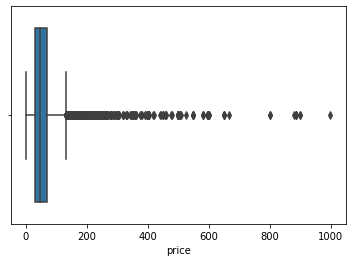

In [22]:
sns.boxplot(x=data_frame['price'])

As we can see, the values are more scatter after the price of 500, hence we can eliminate such outliers

In [23]:
data_frame = data_frame.loc[~((data_frame['price'] > 500) | (data_frame['price'] == 0.0)),:]
data_frame.shape

(22472, 22)

In [24]:
data_frame.head()

,id,listing_url,space,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,A+++ location! This „Einliegerwohnung“ is an e...,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,60.0,200.0,30.0,1,28.0,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,In the summertime we are spending most of our ...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,17.0,0.0,0.0,1,0.0,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,90.0,200.0,50.0,2,20.0,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,"Your room is really big and has 26 sqm, is ver...",Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,26.0,250.0,30.0,1,18.0,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,42.0,0.0,0.0,1,24.0,2,10,197,t,Cozy and large room in the beautiful district ...


###Checking for columns with many NaN


In [25]:
data_frame.isnull().sum()

id                         0
listing_url                0
space                   8509
property_type              0
street                     0
neighbourhood              0
neighbourhood_group        0
beds                      38
bed_type                   0
room_type                  0
amenities                  0
square_feet            22027
price                     41
security_deposit         531
cleaning_fee               1
guests_included            0
extra_people               0
minimum_nights             0
maximum_nights             0
number_of_reviews          0
host_is_superhost         26
summary                  953
dtype: int64

Square feet and Space has a lot of NaN which might not be very useful for analysis so we can get rid of those columns

In [26]:
data_frame = data_frame.drop('space', 1)
data_frame = data_frame.drop('square_feet', 1)

In [27]:
data_frame.head()

,id,listing_url,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
0,2015,https://www.airbnb.com/rooms/2015,Guesthouse,"Berlin, Berlin, Germany",Brunnenstr. Süd,Mitte,2.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,1125,118,t,Great location! 30 of 75 sq meters. This wood...
1,2695,https://www.airbnb.com/rooms/2695,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,f,NaN
2,3176,https://www.airbnb.com/rooms/3176,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,2.0,Real Bed,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1125,143,f,This beautiful first floor apartment is situa...
3,3309,https://www.airbnb.com/rooms/3309,Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,t,Cozy and large room in the beautiful district ...


###Cleaning minimum and maximum nights

We see a very great numbers for minimum and maximum nights. We can restrict the minimum and maximum number of night to 1 to 3 years i.e., 1095 days

In [28]:
data_frame = data_frame.loc[((data_frame['minimum_nights'] > 0) & (data_frame['maximum_nights'] < 1095)),:]
data_frame.shape

(10974, 20)

In [29]:
data_frame.head()

,id,listing_url,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
1,2695,https://www.airbnb.com/rooms/2695,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,f,NaN
3,3309,https://www.airbnb.com/rooms/3309,Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,t,Cozy and large room in the beautiful district ...
5,9991,https://www.airbnb.com/rooms/9991,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,7.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",180.0,400.0,80.0,5,10.0,6,14,6,f,4 bedroom with very large windows and outstand...
7,16401,https://www.airbnb.com/rooms/16401,Apartment,"Berlin, Berlin, Germany",Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,2.0,Real Bed,Private room,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",120.0,0.0,0.0,1,13.0,30,52,0,f,NaN


###Clean number of reviews column

In [30]:
(data_frame['number_of_reviews'] == 0). sum()

1733

There are many places with no reviews at all, we can get rid of such Airbnb listings as well

In [31]:
data_frame = data_frame.loc[~((data_frame['number_of_reviews'] == 0)),:]
data_frame.shape

(9241, 20)

In [32]:
data_frame.head()

,id,listing_url,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
1,2695,https://www.airbnb.com/rooms/2695,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,f,NaN
3,3309,https://www.airbnb.com/rooms/3309,Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,f,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,t,Cozy and large room in the beautiful district ...
5,9991,https://www.airbnb.com/rooms/9991,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,7.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",180.0,400.0,80.0,5,10.0,6,14,6,f,4 bedroom with very large windows and outstand...
8,16644,https://www.airbnb.com/rooms/16644,Apartment,"Berlin, Berlin, Germany",nördliche Luisenstadt,Friedrichshain-Kreuzberg,3.0,Real Bed,Entire home/apt,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",90.0,500.0,50.0,2,20.0,60,365,48,f,Light and sunny 2-Room-turn of the century-fla...


###Convert t and f values to numerical values in host_is_superhost

In [33]:
data_frame['host_is_superhost'] = data_frame['host_is_superhost'].map({'f':0,'t':1})
data_frame.head()

,id,listing_url,property_type,street,neighbourhood,neighbourhood_group,beds,bed_type,room_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,host_is_superhost,summary
1,2695,https://www.airbnb.com/rooms/2695,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,1.0,Real Bed,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,0.0,NaN
3,3309,https://www.airbnb.com/rooms/3309,Apartment,"Berlin, Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,1.0,Pull-out Sofa,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,0.0,First of all: I prefer short-notice bookings. ...
4,7071,https://www.airbnb.com/rooms/7071,Apartment,"Berlin, Berlin, Germany",Helmholtzplatz,Pankow,2.0,Real Bed,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,1.0,Cozy and large room in the beautiful district ...
5,9991,https://www.airbnb.com/rooms/9991,Apartment,"Berlin, Berlin, Germany",Prenzlauer Berg Südwest,Pankow,7.0,Real Bed,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",180.0,400.0,80.0,5,10.0,6,14,6,0.0,4 bedroom with very large windows and outstand...
8,16644,https://www.airbnb.com/rooms/16644,Apartment,"Berlin, Berlin, Germany",nördliche Luisenstadt,Friedrichshain-Kreuzberg,3.0,Real Bed,Entire home/apt,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",90.0,500.0,50.0,2,20.0,60,365,48,0.0,Light and sunny 2-Room-turn of the century-fla...


###Clean Room Type attribute

In [34]:
data_frame['room_type'].isnull().values.any()

False

No cleaning required

##Drawing insights

###Which neighbourhoods are the best to start a new Airbnb?

In [35]:
print('Neighbourhoods which has maximum number of Airbnb are\n', data_frame['neighbourhood'].value_counts())
data_frame['neighbourhood'].describe()

Neighbourhoods which has maximum number of Airbnb are
 Frankfurter Allee Süd FK    526
Tempelhofer Vorstadt        520
Alexanderplatz              403
Reuterstraße                384
Rixdorf                     380
                           ... 
Haselhorst                    1
MV 2                          1
Altstadt-Kietz                1
Heerstraße Nord               1
Allende-Viertel               1
Name: neighbourhood, Length: 135, dtype: int64


count                         9241
unique                         135
top       Frankfurter Allee Süd FK
freq                           526
Name: neighbourhood, dtype: object

Lets check without the neighbourhoods which have less than 200 Airbnbs as they imply that those are not the most popular areas

In [36]:
counts = data_frame['neighbourhood'].value_counts()
data_frame_neighbourhood = data_frame[~data_frame['neighbourhood'].isin(counts[counts < 200].index)]
data_frame.shape

(9241, 20)

In [37]:
neighbourhood_count = data_frame_neighbourhood['neighbourhood'].value_counts()

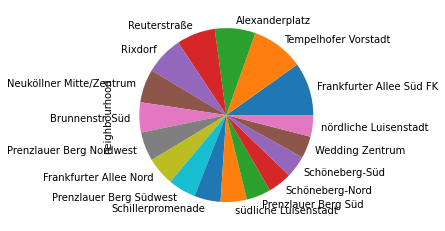

In [38]:
neighbourhood_count.plot(kind='pie')

The above pie chart now shows the most popular neighbourhoods with Airbnbs which will be a good place to start a new Airbnb with the maximum number present in Frankfurter Alle Sud FK

In [39]:
data_frame.shape

(9241, 20)

###What amenities are rare which might interest people in but are not offered by many Airbnbs?

In [40]:
from collections import Counter

amenities_counter = Counter()
data_frame['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(amenities_counter.update)

amenities_counter.most_common(25)

[('Wifi', 8918),
 ('Heating', 8747),
 ('Kitchen', 8707),
 ('Essentials', 8585),
 ('Washer', 7594),
 ('Hair dryer', 6674),
 ('Laptop friendly workspace', 6353),
 ('Hangers', 6220),
 ('Iron', 4936),
 ('Hot water', 4834),
 ('Shampoo', 4763),
 ('TV', 4147),
 ('Family/kid friendly', 3501),
 ('Host greets you', 3456),
 ('Internet', 3032),
 ('Smoke detector', 2815),
 ('Free street parking', 2689),
 ('Refrigerator', 2673),
 ('Dishes and silverware', 2599),
 ('Bed linens', 2489),
 ('Cooking basics', 2443),
 ('Stove', 2432),
 ('Lock on bedroom door', 2411),
 ('Buzzer/wireless intercom', 2390),
 ('Oven', 2175)]

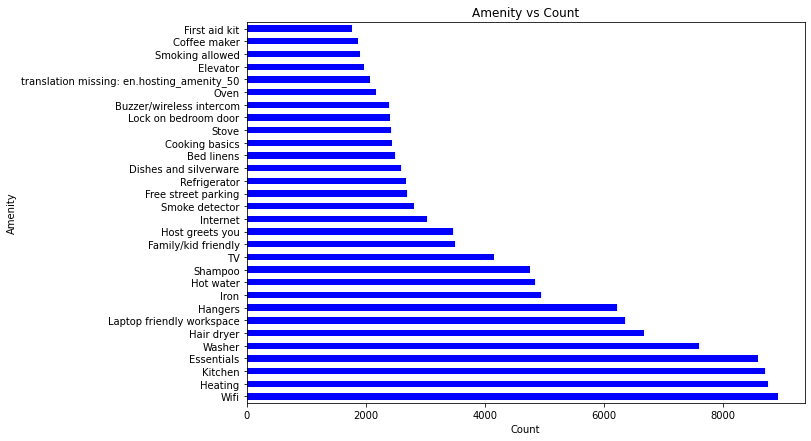

In [41]:
data_frame_amenities = pd.DataFrame(amenities_counter.most_common(30), columns=['amenity_name', 'count'])

data_frame_amenities.plot(kind='barh', x='amenity_name', y='count', figsize=(10,7), legend=False, color='blue', title='Amenity vs Count')
plt.xlabel('Count');
plt.ylabel('Amenity');

There are few unique amenities such as Laptop friendly workspace, Free street parking, Family/ kid friendly, Host greets you, Iron which are rare but liked by people.

###Checking what percentage of hosts are superhosts

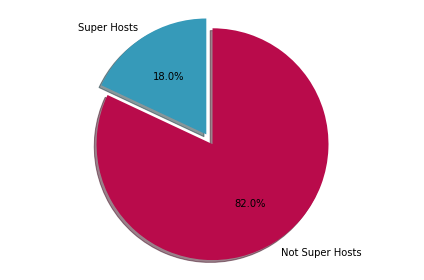

In [42]:
super_host    = data_frame.host_is_superhost.value_counts()[1.0]
not_super_host = data_frame.host_is_superhost.value_counts()[0.0]
names = ['Super Hosts','Not Super Hosts']
size  = [super_host, not_super_host]
explode = (0, 0.1)
colors = ['#369AB9', '#B90B4B']
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=names, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

Since we know that there are not many superhosts in the neighbourhood, it will be a added value for a new Airbnb as people prefer Airbnbs which has a superhost

###Which neighbourhood has the most priced Airbnbs?

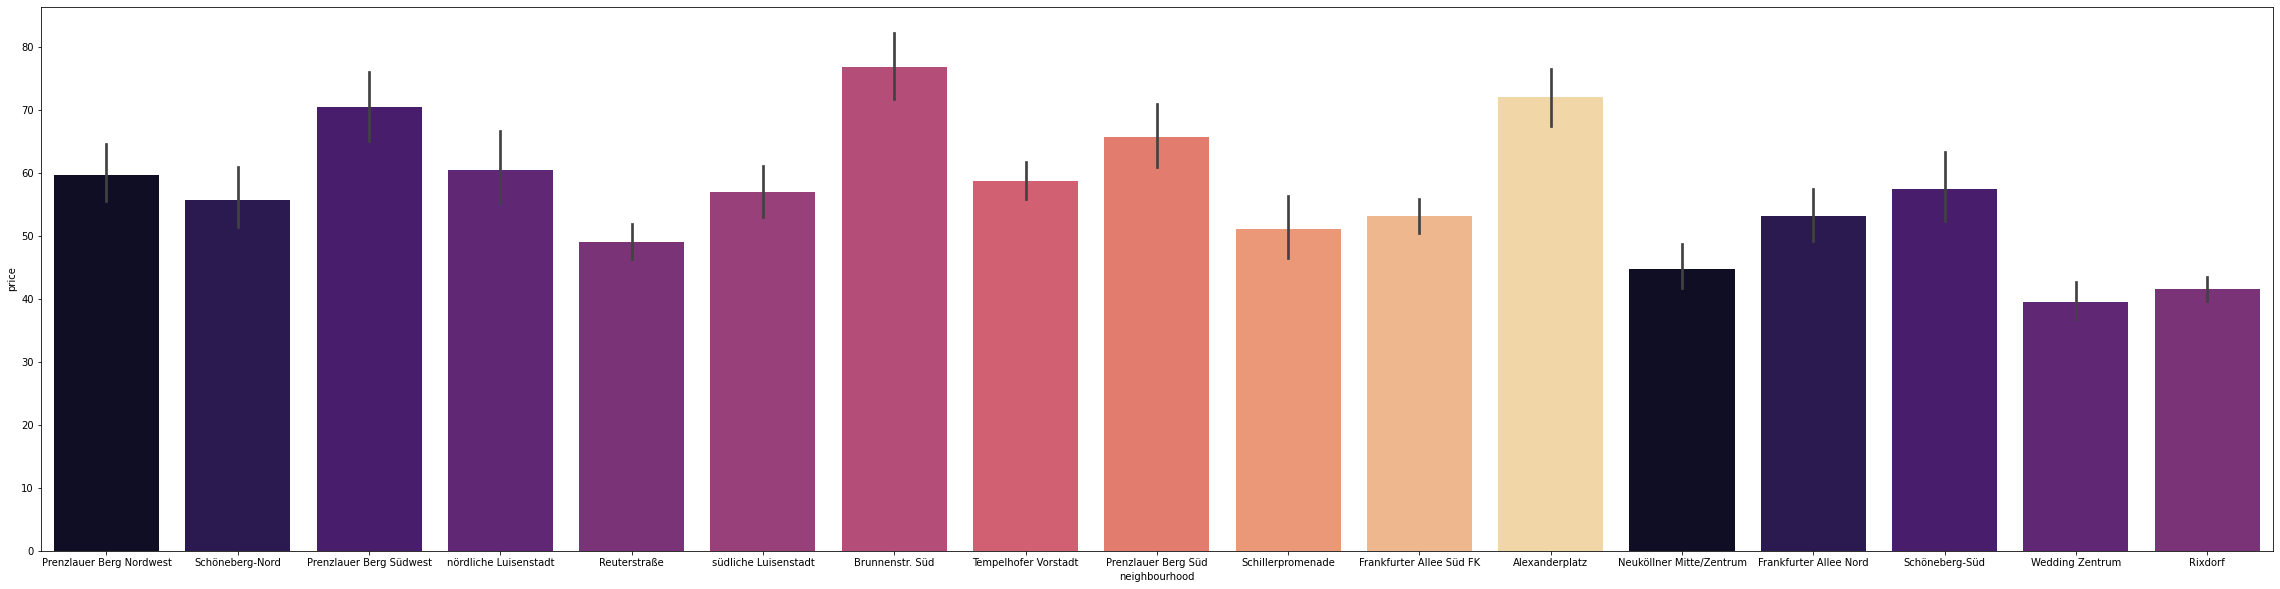

In [43]:
plt.figure(figsize=(40,10))
sns.barplot(x=data_frame_neighbourhood['neighbourhood'], y=data_frame_neighbourhood['price'], palette=sns.color_palette('magma', n_colors=12))

As we see in the above graph, there is not a significant difference in the price of Airbnb. Brunnestr Sud has an edge over the others but still the difference is not huge to gain any insights. Let us try to check in the neighbourhood groups.


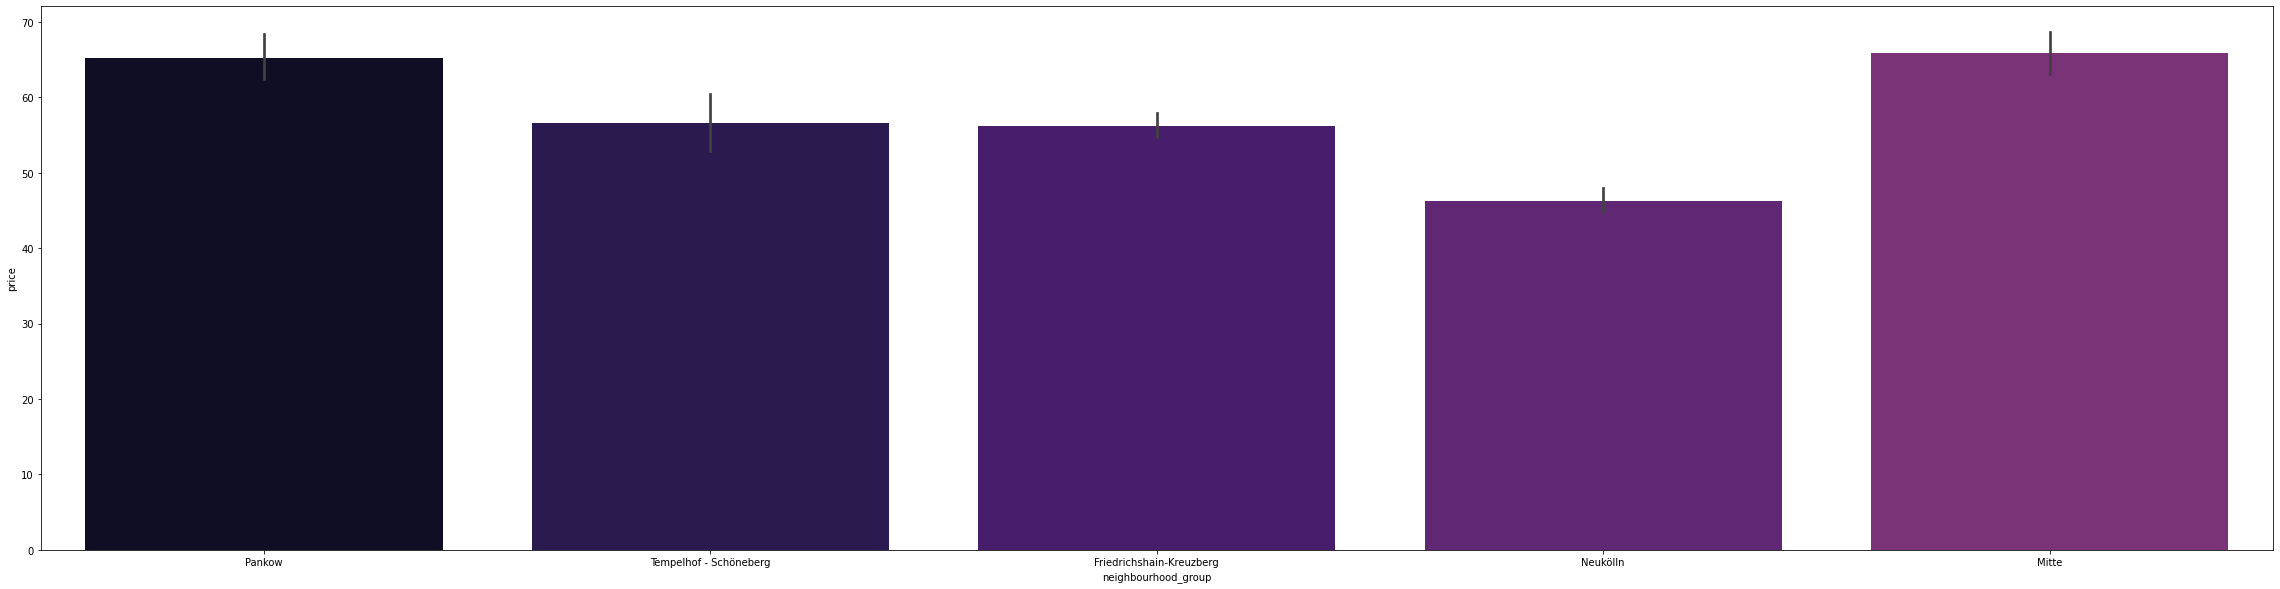

In [44]:
plt.figure(figsize=(40,10))
sns.barplot(x=data_frame_neighbourhood['neighbourhood_group'], y=data_frame_neighbourhood['price'], palette=sns.color_palette('magma', n_colors=12))

It can be said that comparatively Mitte and Pankow have few more Airbnbs even though its still not that evidently having a larger count.

###Gaining insights as to which room type is more prominently present in Berlin

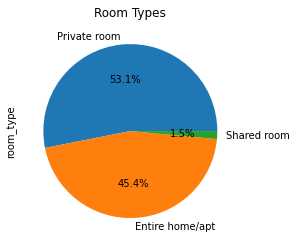

In [45]:
room_type_count = data_frame['room_type'].value_counts()
room_type_count.plot(kind='pie', autopct='%1.1f%%', title='Room Types')

As we can see it is mostly private rooms or entire home/apt which is prominent type of Airbnb in Berlin.

